<a href="https://colab.research.google.com/github/leojoker/football/blob/main/Analise_Detalhada_BR18/analise_br18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neste exemplo, vamos analisar a base de dados de um software que gera uma base de dados para nossa analise do Brasileirão de 2018.

## Vamos analisar o artilheiro, a maior média de gols.

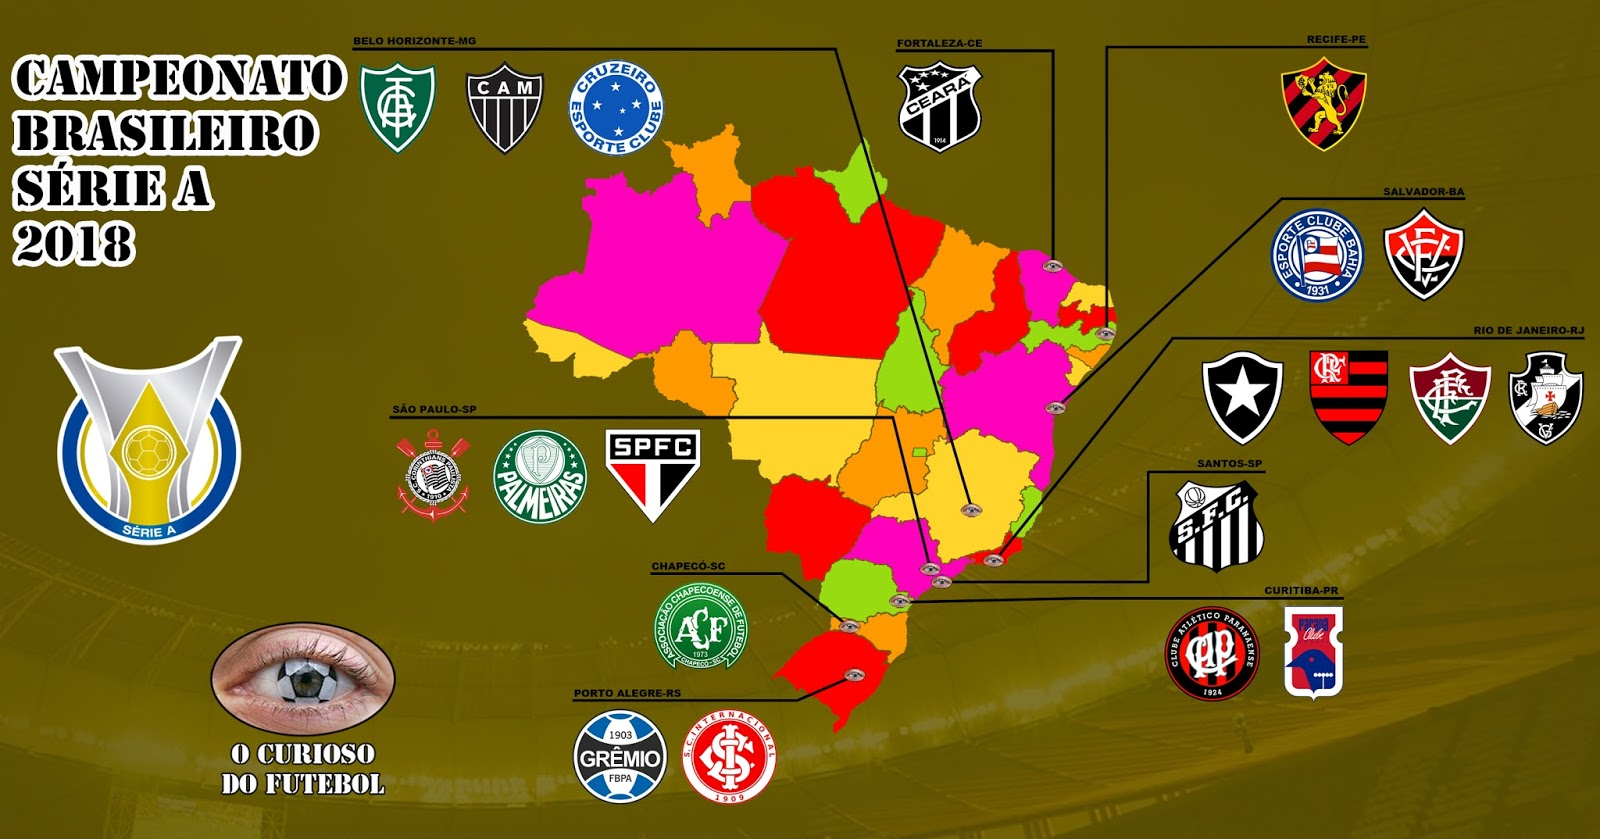

______________________

# Importando recursos necessários





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

"from google.colab import drive\ndrive.mount('/content/drive', force_remount=True)"

# Lendo arquivos

## Lendo base de jogadores

In [ ]:
player_df = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/DADOS_JOGADORES_BR18_OCT.CSV')
player_df.head(5)

,birthday,club_number,club_team_id,club_team_name,contract_ending,country1_id,country1_name,firstname,foot_id,foot_name,...,country2_id,country2_name,position2_id,position2_name,position3_id,position3_name,contract_status_id,contract_status_name,national_team_id,national_team_name
0,1995-03-15,NaN,507,America Mineiro,2019-12-31,29.0,Brazil,Serginho,2.0,Left,...,NaN,NaN,35.0,Attacking midfielder - Central,16.0,Forward - Left,NaN,NaN,NaN,NaN
1,1989-01-26,NaN,507,America Mineiro,2018-12-31,29.0,Brazil,Ruy,1.0,Right,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1989-01-26,10.0,507,America Mineiro,2018-05-21,29.0,Brazil,Ruy Franco de Almeida,2.0,Left,...,NaN,NaN,35.0,Attacking midfielder - Central,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-11-07,27.0,507,America Mineiro,2019-12-31,29.0,Brazil,Lincoln Henrique,2.0,Left,...,NaN,NaN,15.0,Attacking midfielder - Left,35.0,Attacking midfielder - Central,NaN,NaN,NaN,NaN
4,1988-09-21,11.0,507,America Mineiro,2018-12-31,29.0,Brazil,Luan,2.0,Left,...,NaN,NaN,15.0,Attacking midfielder - Left,NaN,NaN,NaN,NaN,NaN,NaN


## Lendo tabela de estatisticas dos jogadores em uma partida

In [ ]:
stats = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/JOGADORES_PARTIDAS_BR18_OCT.CSV')
stats.head(5)

,% of accurate passes,% of blocked shots,% of challenges won,% of one-touch passes accuracy,% of opponent`s blocked shots,% of opponent`s scoring shots,% of opponent`s shots wide,% of scoring shots,% of shots wide,"% penalties scored, including short-data information",...,"Was substituted in, including short-data information","Was substituted out, including short-data information","YC, including short-data information",Yellow cards,Zonal marking grave mistake: a player allows opponent to outnumber his team in playing situation,match_id,player_id,player_name,team_id,team_name
0,81.82,0.0,59.26,66.67,0.0,0.0,57.14,66.67,33.33,NaN,...,1.0,NaN,NaN,NaN,NaN,1143090.0,13001,Leandro Damiao da Silva dos Santos,367,Internacional
1,86.67,50.0,83.33,50.00,12.5,12.5,50.00,0.00,0.00,NaN,...,NaN,1.0,NaN,NaN,NaN,1143090.0,13264,Andres Nicolas D'alessandro,367,Internacional
2,94.12,NaN,100.00,NaN,0.0,12.5,50.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1143090.0,13404,Marcelo Lomba do Nascimento,367,Internacional
3,85.71,0.0,38.89,75.00,0.0,12.5,50.00,0.00,100.00,NaN,...,NaN,NaN,NaN,NaN,NaN,1143090.0,13777,Edenilson Andrade dos Santos,367,Internacional
4,92.00,NaN,93.75,100.00,0.0,12.5,50.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1143090.0,22052,Victor Leandro Cuesta,367,Internacional


## Lendo base de partidas

In [ ]:
match_df = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/JOGADORES_PARTIDAS_BR18_OCT.CSV')
match_df.head(5)

,Unnamed: 0,duration,id,match_date,match_name,round_id,round_name,season_id,season_name,status_id,...,team2_name,team2_score,tournament_id,tournament_name,referee_id,referee_name,stadium_id,stadium_name,home_pos,away_pos
0,721,98.02,1143160,2018-11-22 00:30:00,Internacional - Atletico Mineiro,36.0,Week 36,21,2018,5,...,Atletico Mineiro,2,42,Brazil. Serie A,1731.0,Raphael Claus,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
1,722,109.84,1143146,2018-11-18 22:00:00,Botafogo RJ - Internacional,35.0,Week 35,21,2018,5,...,Internacional,0,42,Brazil. Serie A,1891.0,Rafael Traci,5175.0,Estadio Olimpico Joao Havelange,NaN,NaN
2,723,98.35,1143162,2018-11-25 22:00:00,Atletico Paranaense - Ceara,37.0,Week 37,21,2018,5,...,Ceara,2,42,Brazil. Serie A,NaN,NaN,1342.0,Estadio Joaquim Americo Guimaraes,NaN,NaN
3,724,97.70,1143157,2018-11-23 02:00:00,Ceara - Parana,36.0,Week 36,21,2018,5,...,Parana,0,42,Brazil. Serie A,NaN,NaN,2667.0,Estadio Governador Placido Aderaldo Castelo,NaN,NaN
4,725,100.56,1143145,2018-11-20 01:00:00,Fluminense - Ceara,35.0,Week 35,21,2018,5,...,Ceara,0,42,Brazil. Serie A,NaN,NaN,1325.0,Estadio Jornalista Mario Filho (Maracana),NaN,NaN


# Explorando as bases

## Analisando o tamanho das bases

In [ ]:
print('Stats:',stats.shape)
print('Match:',match_df.shape)
print('Player:',player_df.shape)

Stats: (25296, 368)
Match: (746, 25)
Player: (936, 30)


## Listando colunas das bases



In [ ]:
list(stats.columns)

['% of accurate passes',
 '% of blocked shots',
 '% of challenges won',
 '% of one-touch passes accuracy',
 '% of opponent`s blocked shots',
 '% of opponent`s scoring shots',
 '% of opponent`s shots wide',
 '% of scoring shots',
 '% of shots wide',
 '% penalties scored, including short-data information',
 'Accurate one-touch passes',
 'Accurate passes in the opposition half',
 'Accurate passes into the defensive third of the pitch',
 'Accurate passes into the final third of the pitch',
 'Accurate passes into the middle third of the pitch',
 'Accurate passes, % back (capture angle - 180 degrees)',
 'Accurate passes, % forward (capture angle - 180 degrees)',
 'Accurate passes, % to the left (capture angle - 180 degrees)',
 'Accurate passes, % to the right (capture angle - 180 degrees)',
 'Actions / successful',
 'Actions / successful %',
 'Actions in center',
 'Actions in opp. third',
 'Actions in own third',
 'Air challenges',
 'Air challenges - attacking',
 'Air challenges - defensive'

In [ ]:
list(match_df.columns)

['Unnamed: 0',
 'duration',
 'id',
 'match_date',
 'match_name',
 'round_id',
 'round_name',
 'season_id',
 'season_name',
 'status_id',
 'status_name',
 'team1_id',
 'team1_name',
 'team1_score',
 'team2_id',
 'team2_name',
 'team2_score',
 'tournament_id',
 'tournament_name',
 'referee_id',
 'referee_name',
 'stadium_id',
 'stadium_name',
 'home_pos',
 'away_pos']

In [ ]:
list(player_df.columns)

['birthday',
 'club_number',
 'club_team_id',
 'club_team_name',
 'contract_ending',
 'country1_id',
 'country1_name',
 'firstname',
 'foot_id',
 'foot_name',
 'gender_id',
 'gender_name',
 'height',
 'id',
 'lastname',
 'national_number',
 'position1_id',
 'position1_name',
 'ts',
 'weight',
 'country2_id',
 'country2_name',
 'position2_id',
 'position2_name',
 'position3_id',
 'position3_name',
 'contract_status_id',
 'contract_status_name',
 'national_team_id',
 'national_team_name']

## Selecionando uma ou mais colunas

In [ ]:
stats.loc[:,['match_id','player_id','Shots']]

,match_id,player_id,Shots
0,1143090.0,13001,3.0
1,1143090.0,13264,4.0
2,1143090.0,13404,NaN
3,1143090.0,13777,1.0
4,1143090.0,22052,NaN
...,...,...,...
25291,1143175.0,467593,1.0
25292,1143175.0,475915,NaN
25293,1143175.0,479142,NaN
25294,1143175.0,865421,NaN


## Analisando colunas

In [ ]:
# Pegando valores únicos de uma coluna
# Por exemplo, quais equipes estao na minha base?
stats['team_name'].unique()

array(['Internacional', 'Sao Paulo', 'Sport Recife', 'Vitoria',
       'Corinthians', 'Chapecoense', 'Gremio', 'CR Flamengo', 'Cruzeiro',
       'Palmeiras', 'Bahia', 'Parana', 'Fluminense', 'Atletico Mineiro',
       'Botafogo RJ', 'America Mineiro', 'Ceara', 'Atletico Paranaense',
       'Vasco da Gama', 'Santos', 'Avai', 'Coritiba', 'Ponte Preta',
       'Atletico GO'], dtype=object)

In [ ]:
# Pegando número de valores únicos de uma coluna
# Por exemplo, quantas equipes estao na minha base?
stats['team_name'].nunique()

24

In [ ]:
# Pegando soma de valores de uma coluna
# Por exemplo, quantos gols foram computados na minha base?
stats['Goals'].sum()

1660.0

In [ ]:
# Pegando maior valor de uma coluna
# Por exemplo, qual o maior numero de gols que um jogador fez em uma partida desse brasileiro
stats['Goals'].max()

3.0

# Integrando bases

In [ ]:
df = stats.merge(player_df, left_on=['player_id'], right_on=['id'])
df = df.merge(match_df, left_on=['match_id'], right_on=['id'])
df

,% of accurate passes,% of blocked shots,% of challenges won,% of one-touch passes accuracy,% of opponent`s blocked shots,% of opponent`s scoring shots,% of opponent`s shots wide,% of scoring shots,% of shots wide,"% penalties scored, including short-data information",...,team2_name,team2_score,tournament_id,tournament_name,referee_id,referee_name,stadium_id,stadium_name,home_pos,away_pos
0,81.82,0.0,59.26,66.67,0.0,0.00,57.14,66.67,33.33,NaN,...,Sao Paulo,1,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
1,86.67,50.0,83.33,50.00,12.5,12.50,50.00,0.00,0.00,NaN,...,Sao Paulo,1,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
2,94.12,NaN,100.00,NaN,0.0,12.50,50.00,NaN,NaN,NaN,...,Sao Paulo,1,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
3,85.71,0.0,38.89,75.00,0.0,12.50,50.00,0.00,100.00,NaN,...,Sao Paulo,1,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
4,92.00,NaN,93.75,100.00,0.0,12.50,50.00,NaN,NaN,NaN,...,Sao Paulo,1,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,90.91,NaN,100.00,NaN,0.0,33.33,55.56,NaN,NaN,NaN,...,Santos,3,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1327.0,Estadio Club de Regatas Vasco da Gama,NaN,NaN
18873,87.76,NaN,63.64,16.67,0.0,33.33,55.56,NaN,NaN,NaN,...,Santos,3,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1327.0,Estadio Club de Regatas Vasco da Gama,NaN,NaN
18874,91.46,0.0,64.00,75.00,0.0,33.33,55.56,0.00,100.00,NaN,...,Santos,3,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1327.0,Estadio Club de Regatas Vasco da Gama,NaN,NaN
18875,62.50,0.0,62.50,NaN,0.0,0.00,40.00,0.00,0.00,NaN,...,Santos,3,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1327.0,Estadio Club de Regatas Vasco da Gama,NaN,NaN


# Filtrando bases

In [ ]:
#Filtrando centro-avantes do país
filter_df = df.loc[df['position1_name']=='Forward - Central']
filter_df

,% of accurate passes,% of blocked shots,% of challenges won,% of one-touch passes accuracy,% of opponent`s blocked shots,% of opponent`s scoring shots,% of opponent`s shots wide,% of scoring shots,% of shots wide,"% penalties scored, including short-data information",...,team2_name,team2_score,tournament_id,tournament_name,referee_id,referee_name,stadium_id,stadium_name,home_pos,away_pos
0,81.82,0.0,59.26,66.67,0.0,0.00,57.14,66.67,33.33,NaN,...,Sao Paulo,1,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
16,83.33,0.0,34.62,50.00,0.0,18.75,31.25,0.00,100.00,NaN,...,Sao Paulo,1,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
20,100.00,NaN,20.00,100.00,0.0,50.00,50.00,NaN,NaN,NaN,...,Sao Paulo,1,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
25,66.67,NaN,25.00,100.00,0.0,50.00,50.00,NaN,NaN,NaN,...,Sao Paulo,1,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
27,60.00,0.0,31.25,50.00,0.0,100.00,0.00,100.00,0.00,NaN,...,Vitoria,1,42,Brazil. Serie A,1941.0,Savio Pereira Sampaio,1328.0,Estadio Jose Pinheiro Borba (Beira-Rio),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Vasco da Gama,1,42,Brazil. Serie A,NaN,NaN,1330.0,Estadio Municipal Paulo Machado de Carvalho,NaN,NaN
18848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Vasco da Gama,1,42,Brazil. Serie A,NaN,NaN,1330.0,Estadio Municipal Paulo Machado de Carvalho,NaN,NaN
18851,62.50,NaN,100.00,NaN,0.0,33.33,33.33,NaN,NaN,NaN,...,Santos,3,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1327.0,Estadio Club de Regatas Vasco da Gama,NaN,NaN
18863,81.58,0.0,38.10,NaN,0.0,0.00,37.50,100.00,0.00,NaN,...,Santos,3,42,Brazil. Serie A,1906.0,Braulio da Silva Machado,1327.0,Estadio Club de Regatas Vasco da Gama,NaN,NaN


In [ ]:
#Filtrando em cima da base filtrada (em linhas e colunas ao mesmo tempo)
#Quero os jogos/atacantes nos quais o centro-avante fez mais de um gol
filter_df2 = filter_df.loc[filter_df['Goals']>1,['match_name','player_name']]
filter_df2

,match_name,player_name
0,Internacional - Sao Paulo,Leandro Damiao da Silva dos Santos
118,Chapecoense - Internacional,Leandro Marcos Pereira
841,CR Flamengo - Chapecoense,Paolo Jose Guerrero Gonzalez
1764,Fluminense - Atletico Mineiro,Jose Henrique da Silva Dourado
1938,Fluminense - Santos,Jose Henrique da Silva Dourado
2210,Palmeiras - Vasco da Gama,Miguel Anhel Borja Hernandez
2253,Palmeiras - Sport Recife,Deyverson Brum Silva Acosta
2342,Fluminense - Sport Recife,Andre Felipe Ribeiro de Souza
2508,Sport Recife - Atletico GO,Andre Felipe Ribeiro de Souza
2676,Sport Recife - Coritiba,Diego de Souza Andrade


In [ ]:
#Usando mais de uma condição
#Quero os atacantes que fizeram gol na partida e ganharam mais que 50% das disputas aéreas na mesma partida
filter_df2 = filter_df.loc[(filter_df['Goals']>0) & (filter_df['Air challenges, %']>=50),['match_name','player_name']]
filter_df2

,match_name,player_name
0,Internacional - Sao Paulo,Leandro Damiao da Silva dos Santos
55,Corinthians - Internacional,Leandro Damiao da Silva dos Santos
286,Internacional - Botafogo RJ,Leandro Damiao da Silva dos Santos
505,Internacional - Corinthians,Leandro Damiao da Silva dos Santos
705,Avai - CR Flamengo,Leandro Damiao da Silva dos Santos
...,...,...
17460,Botafogo RJ - Fluminense,Welker Marcal de Almeida
17688,America Mineiro - Atletico Mineiro,Ricardo de Oliveira
18310,America Mineiro - Santos,Gabriel Barbosa Almeida
18515,Ceara - Santos,Arthur Mendonca Cabral


# Agrupando bases

In [ ]:
# Quem foram os 10 atacantes que fizeram mais gols?

## Primeiro preciso agrupar minha base de forma que a juntar tudo que é de cada jogador (groupby)
## Depois eu somo os valores da coluna Goals 
goals = filter_df.groupby(['player_name'])['Goals'].sum()

## E se eu quiser pegar os 10 maiores, posso ordenar minha tabela e pegar os 10 maiores
goals = goals.nlargest(10).reset_index()
goals

,player_name,Goals
0,Jose Henrique da Silva Dourado,24.0
1,Diego de Souza Andrade,20.0
2,Ricardo de Oliveira,19.0
3,Andre Felipe Ribeiro de Souza,17.0
4,Gabriel Barbosa Almeida,17.0
5,Deyverson Brum Silva Acosta,15.0
6,Roger Rodrigues da Silva,14.0
7,Santiago Trellez Viveros,14.0
8,Leandro Damiao da Silva dos Santos,13.0
9,Pablo Felipe Teixeira,13.0


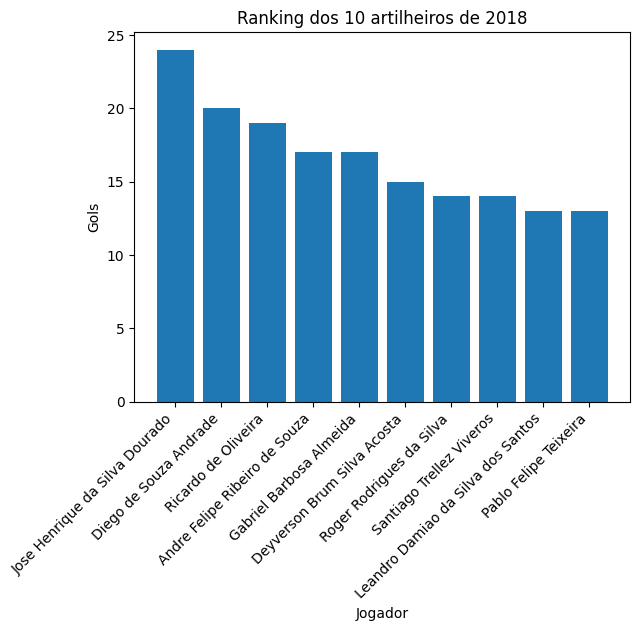

In [ ]:
#Plotar um gráfico com os 10 artilheiros do ano
top10 = goals.nlargest(10, 'Goals')
plt.bar(top10['player_name'], top10['Goals'])
plt.xlabel('Jogador')
plt.ylabel('Gols')
plt.title('Ranking dos 10 artilheiros de 2018')
plt.xticks(rotation=45, ha='right')
plt.show()

# Quais equipes tiveram a maior média/jogo de chances claras do ano?

In [ ]:
## Primeiro preciso agrupar minha base de forma que a juntar tudo que é de cada equipe de uma partida (groupby)
## Depois eu somo os valores da coluna chances claras 
team_match = df.groupby(['team_name','match_id'])['Chance'].sum()

print('--------------------------------------')
print('Agregado por equipe/partida')
display(team_match)

## Depois eu aplico média agrupando por time
team_match = team_match.groupby(['team_name']).mean()

print('--------------------------------------')
print('Agregado por equipe')

## E se eu quiser ver ordenado, posso ordenar minha tabela
team_match = team_match.sort_values().reset_index()
team_match

--------------------------------------
Agregado por equipe/partida


team_name        match_id 
America Mineiro  1142803.0    2.0
                 1142816.0    3.0
                 1142823.0    3.0
                 1142835.0    0.0
                 1142847.0    4.0
                             ... 
Vitoria          1143104.0    0.0
                 1143112.0    0.0
                 1143124.0    0.0
                 1143138.0    0.0
                 1143144.0    0.0
Name: Chance, Length: 1441, dtype: float64

--------------------------------------
Agregado por equipe


,team_name,Chance
0,Ceara,0.684211
1,Avai,0.729730
2,Parana,0.815789
3,Coritiba,0.864865
4,Ponte Preta,0.868421
5,Atletico GO,0.945946
6,America Mineiro,1.105263
7,Chapecoense,1.200000
8,Corinthians,1.236111
9,Internacional,1.500000


In [ ]:
# Quais equipes tiveram a maior relação de gols/chute do ano?

## Primeiro preciso agrupar minha base de forma que a juntar tudo que é de cada equipe de uma partida (groupby)
## Depois eu somo os valores da coluna chances claras 
team_match = df.groupby(['team_name'])[['Shots','Goals']].sum()

print('--------------------------------------')
print('Agregado por equipe/partida')
display(team_match)

## Posso criar uma coluna calculada de gol/chance
team_match['Shots/goal'] = team_match['Shots']/team_match['Goals']
gols = team_match.reset_index()
print('--------------------------------------')
print('Agregado por equipe')



## E se eu quiser ver ordenado, posso ordenar minha tabela
chance = team_match.sort_values(by=['Goals'], ascending=False).reset_index()
chance

--------------------------------------
Agregado por equipe/partida


,Shots,Goals
team_name,,
America Mineiro,325.0,26.0
Atletico GO,135.0,14.0
Atletico Mineiro,661.0,66.0
Atletico Paranaense,659.0,66.0
Avai,69.0,9.0
Bahia,759.0,68.0
Botafogo RJ,763.0,71.0
CR Flamengo,870.0,88.0
Ceara,397.0,27.0


--------------------------------------
Agregado por equipe


,team_name,Shots,Goals,Shots/goal
0,Palmeiras,828.0,104.0,7.961538
1,CR Flamengo,870.0,88.0,9.886364
2,Gremio,680.0,77.0,8.831169
3,Santos,721.0,74.0,9.743243
4,Cruzeiro,863.0,72.0,11.986111
5,Botafogo RJ,763.0,71.0,10.746479
6,Vitoria,712.0,71.0,10.028169
7,Bahia,759.0,68.0,11.161765
8,Atletico Paranaense,659.0,66.0,9.984848
9,Atletico Mineiro,661.0,66.0,10.015152


# Plotando gráficos

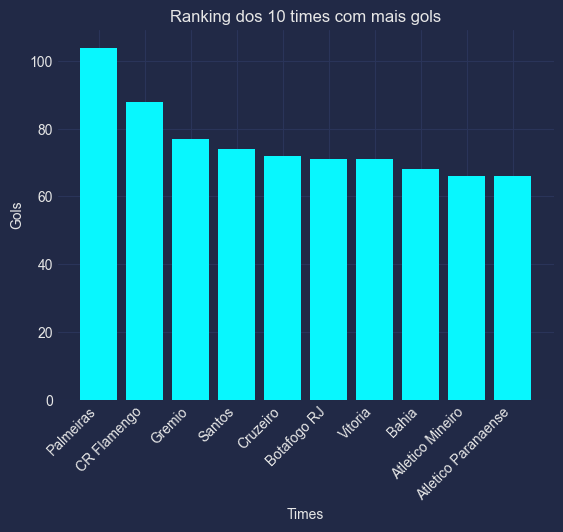

In [ ]:
#Plotar um gráfico com o Ranking dos 10 times com mais gols
top5 = gols.nlargest(10, 'Goals')
plt.bar(top5['team_name'], top5['Goals'])
plt.xlabel('Times')
plt.ylabel('Gols')
plt.title('Ranking dos 10 times com mais gols')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
!pip install mplcyberpunk
import mplcyberpunk


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: C:\Users\leojo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


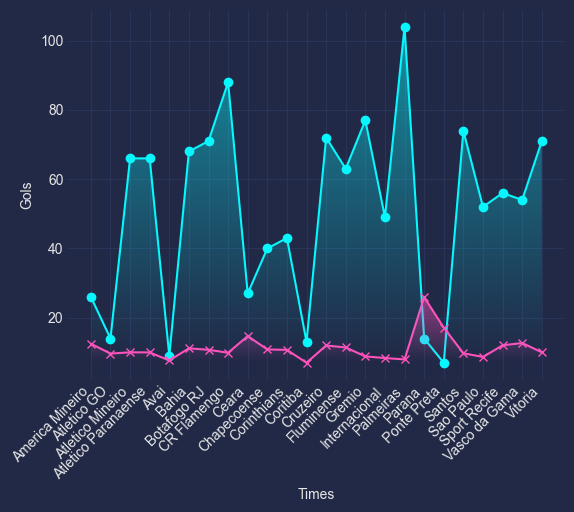

In [ ]:
plt.style.use("cyberpunk")

plt.plot(gols['Goals'], marker='o')
plt.plot(team_match['Shots/goal'], marker='x')
plt.xlabel('Times')
plt.ylabel('Gols')
plt.xticks(rotation=45, ha='right')

mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.5)

plt.show()